https://github.com/SuhrudhSarathy/drone_sim

In [1]:
"""Tests a multidrone simulation"""
from drone_sim.sim import Drone
from drone_sim.viz import Body
from drone_sim.viz import Graphics
from drone_sim.sim.parameters import *

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib widget

DO_ANIMATION = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
import time
from simple_pid import PID

In [3]:
def calculate_rotor_vels(f, tphi, ttheta, tpsi):
    b = np.array([f, tphi, ttheta, tpsi]).reshape(-1, 1)

    a = np.array(
        [
            [K, K, K, K],
            [L*K, 0, 0, -L*K],
            [0, L*K, -L*K, 0],
            [B, -B, B, -B]
        ]
    )
    
    x = np.linalg.solve(a, b)

    return x

## Drone simulation

0
inf
LOG: The Drone is dead. Reset Simulation


/var/folders/yb/6zm8nkws2szdxj4w3pxwm32w0000gn/T/ipykernel_7073/1944489447.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  T = (AX * 5)/np.sin(drone.phi)


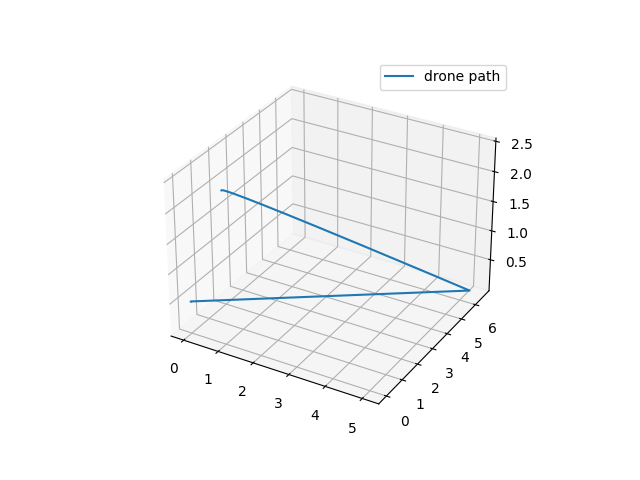

In [6]:

drone = Drone(True)
drone.z = 2.5

drone.phi = 0
print(drone.phi)

# Make a body
body = Body()
body.attach_to(drone)


# Calculate setpoints

# Make PIDs for four control variables
# pid_phi = PID(5, 0.1, 0.1, setpoint=water_temp) # ROLL in degrees
# pid_theta = PID(5, 0.1, 0.1, setpoint=water_temp) # PITCH in degrees
# pid_psi = PID(5, 0.1, 0.1, setpoint=water_temp) # YAW in degrees
# pid_thrust = PID(5, 0.1, 0.1, setpoint=water_temp) # THROTTLE percent (normalised 0 to 1)

if DO_ANIMATION:
    # Make Graphics object
    ui = Graphics()
    ui.add_actor(drone)

T = (AX * 5)/np.sin(drone.phi)
print(T)

x_vec = []
y_vec = []
z_vec = []

for i in range(1050):
    x = calculate_rotor_vels(T, 0, 0, 0)
    # w1, w2, w3, w4 = x[0][0], x[1][0], x[2][0], x[3][0]

    if i < 25:

        w1, w2, w3, w4 = NULL_ROT, NULL_ROT, NULL_ROT, 1.1*NULL_ROT
    else:
        w1, w2, w3, w4 = NULL_ROT, NULL_ROT, NULL_ROT, NULL_ROT
    # print(drone.vx)

    time_ = time.time()
    drone.step([w1, w2, w3, w4])
    if DO_ANIMATION:
        ui.update()
    
    x_vec.append(drone.x)
    y_vec.append(drone.y)
    z_vec.append(drone.z)


# plt.figure()
# plt.plot(x_vec,y_vec)
# plt.show()

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x_vec, y_vec, z_vec, label='drone path')
ax.legend()
plt.show()